Let's start with clustering all the stances from the right foot only.
The stances are calculated from one feature (the sum of all sensors under the right foot for each patient)

### Importing

In [ ]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import decomposition

import os

from tqdm.auto import tqdm

from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

import ast

import matplotlib.pyplot as plt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Reading the dataset

In [ ]:
# path of original data folder
data_path = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Data"
csvD_path = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Data/csv_files"
demographics = "/content/drive/MyDrive/ITMO-Master's/Thesis/3rd_semester/Data/demographics.csv"
dem_df = pd.read_csv(demographics)

In [ ]:
# reading the data info file about the right stances
right_stances_level_df= pd.read_csv(data_path + '/data_right_stances.csv')

In [ ]:
right_stances_level_df.head()

,ID,y,level,right_stances
0,GaPt03,1,3.0,"[23.1, 41.69, 71.17, 138.82, 195.69, 230.78, 2..."
1,GaPt03,1,3.0,"[34.76, 61.27, 113.19, 165.22, 218.02, 260.26,..."
2,GaPt03,1,3.0,"[25.41, 39.38, 55.55, 89.98, 125.95, 168.63, 2..."
3,GaPt03,1,3.0,"[27.72, 46.31, 74.58, 135.85, 189.09, 226.93, ..."
4,GaPt03,1,3.0,"[32.45, 55.55, 113.3, 180.95, 243.87, 285.01, ..."


In [ ]:
right_stances_level_df.shape

(31951, 4)

In [ ]:
len(right_stances_level_df['ID'].unique()) # number of different subjects

165

In [ ]:
right_stances_level_df.index

RangeIndex(start=0, stop=31951, step=1)

### The last column is saved as string while it is a list, in the following we transform it to list.

In [ ]:
type(right_stances_level_df["right_stances"][0])

str

In [ ]:
from ast import literal_eval
right_stances_level_df['right_stances'] =[ast.literal_eval(x) for x in right_stances_level_df['right_stances'] ]
# t=df.right_stances.apply(lambda s: list(ast.literal_eval(s)))

In [ ]:
type(right_stances_level_df['right_stances'][0] )

list

### Deleting lists shorter than 2 items

In [ ]:
# getting the stances lists
stances = right_stances_level_df['right_stances']

In [ ]:
stances

0        [23.1, 41.69, 71.17, 138.82, 195.69, 230.78, 2...
1        [34.76, 61.27, 113.19, 165.22, 218.02, 260.26,...
2        [25.41, 39.38, 55.55, 89.98, 125.95, 168.63, 2...
3        [27.72, 46.31, 74.58, 135.85, 189.09, 226.93, ...
4        [32.45, 55.55, 113.3, 180.95, 243.87, 285.01, ...
                               ...                        
31946    [34.32, 294.47, 378.95, 497.2, 559.68, 614.35,...
31947    [78.65, 367.07, 448.8, 551.32, 620.73, 679.14,...
31948    [143.99, 355.96, 471.02, 551.32, 627.99, 676.5...
31949    [159.17, 374.77, 473.99, 565.51, 661.43, 747.3...
31950    [22.55, 63.36, 99.0, 145.2, 205.92, 254.87, 32...
Name: right_stances, Length: 31951, dtype: object

In [ ]:
# get the ids of lists that have less than 2 elements
indices = [ id for id,x in enumerate(stances) if len(x)<2 ]

In [ ]:
# All the stances #31951
right_stances_level_df.shape

(31951, 4)

In [ ]:
# drop stances lists that have less than 2 elements
updated_df= right_stances_level_df.drop(indices)

In [ ]:
# Stances with more than 1 vlaue #30595
updated_df.shape

(30595, 4)

------------


Checking all the remaining lists are longer than 2

In [ ]:
stances2 = updated_df['right_stances']

In [ ]:
indices2 = [ id for id,x in enumerate(stances2) if len(x)<2 ]

In [ ]:
indices2 # there are no lists shorter than 2 in the updated_df dataframe

[]

--------------


### Shuffling the dataset

In [ ]:
df = updated_df.sample(frac = 1,random_state=4)

In [ ]:
df.shape

(30595, 4)

In [ ]:
df.head()

,ID,y,level,right_stances
16712,GaCo17,0,0.0,"[25.08, 301.29, 402.49, 517.88, 573.98, 600.16..."
6497,SiCo01,0,0.0,"[27.83, 55.77, 98.12, 156.97, 227.26, 284.57, ..."
15449,GaCo10,0,0.0,"[52.69, 127.93, 186.89, 246.18, 310.09, 403.48..."
25273,JuPt15,1,2.0,"[161.48, 436.26, 572.55, 729.3, 802.34, 842.71..."
5199,SiPt34,1,1.0,"[71.39, 188.21, 327.58, 470.69, 595.54, 681.56..."


Checking AGAIN that all the stances lists have at least 2 items

In [ ]:
IDs = [ id for id,x in enumerate(df['right_stances']) if len(x)<2 ]

In [ ]:
len(IDs) # the length is 0 then yes all the stances lists have at least 2 items

0

### Transforming the dataset to a compitable format for the tslearn library.

In [ ]:
X = to_time_series_dataset(df['right_stances'].to_list())

In [ ]:
len(X)

30595

### Clustering for only 1000 subjects

In [ ]:
KM_right = TimeSeriesKMeans(n_clusters=4, metric="dtw")
clusters_right = KM_right.fit_predict(X[:1000]) # Excuteing time ~ 42 mins

#### Visualizing the clusters

In [ ]:
predicted={0:[], 1:[], 2:[], 3:[]}
for i, v in enumerate(clusters_right):
    predicted[v].append(i)

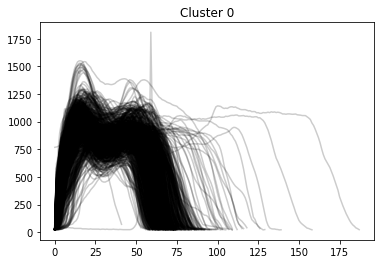

In [ ]:
for label in predicted[0]:
  plt.plot(X[label].ravel(), "k-", alpha=.2)
  #plt.plot(km.cluster_centers_[0].ravel(), "r-")
  plt.title("Cluster 0")

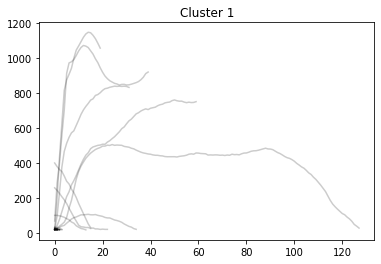

In [ ]:
for label in predicted[1]:
  plt.plot(X[label].ravel(), "k-", alpha=.2)
  #plt.plot(km.cluster_centers_[0].ravel(), "r-")
  plt.title("Cluster 1")

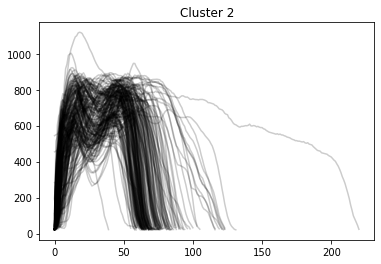

In [ ]:
for label in predicted[2]:
  plt.plot(X[label].ravel(), "k-", alpha=.2)
  #plt.plot(km.cluster_centers_[0].ravel(), "r-")
  plt.title("Cluster 2")

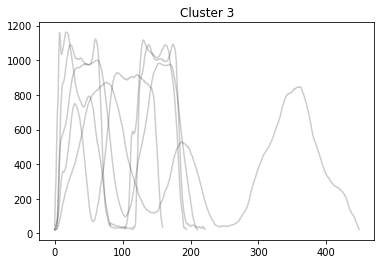

In [ ]:
for label in predicted[3]:
  plt.plot(X[label].ravel(), "k-", alpha=.2)
  #plt.plot(km.cluster_centers_[0].ravel(), "r-")
  plt.title("Cluster 3")

#### Calculate Data Distributions among the clusters

In [ ]:
# the levels of 1000 subjects that were clustered
levels = df['level'][:1000]

In [ ]:
# creating a datafrmae that contains each time series' cluster with the actual PD_level
distriutions = pd.DataFrame(list(zip(clusters_right, levels)),
               columns =['cluster', 'PD_level'])

In [ ]:
distriutions

,cluster,PD_level
0,0,0.0
1,2,0.0
2,0,0.0
3,0,2.0
4,2,1.0
...,...,...
995,0,2.0
996,0,0.0
997,2,2.0
998,0,3.0


In [ ]:
counts = distriutions.pivot_table(index = ['cluster','PD_level'], aggfunc ='size')

In [ ]:
# the counts pivot table shows the count of subjects of each PD level in each cluster
counts

cluster  PD_level
0        0.0         239
         1.0         272
         2.0         195
         3.0          64
1        0.0           5
         1.0           9
         2.0          15
         3.0           1
2        0.0          77
         1.0          64
         2.0          32
         3.0          22
3        0.0           1
         1.0           2
         3.0           2
dtype: int64

In [ ]:
# Calculating the number of each PD level in the clustered data
PD_0 = counts[0][0.0]+counts[1][0.0]+counts[2][0.0]+counts[3][0.0]
PD_1 = counts[0][1.0]+counts[1][1.0]+counts[2][1.0]+counts[3][1.0]
PD_2 = counts[0][2.0]+counts[1][2.0]+counts[2][2.0]#+counts[3][2.0]
PD_3 = counts[0][3.0]+counts[1][3.0]+counts[2][3.0]+counts[3][3.0]

In [ ]:
# the counts from the pivot table `counts`
counts.values

array([239, 272, 195,  64,   5,   9,  15,   1,  77,  64,  32,  22,   1,
         2,   2])

In [ ]:
# Finding the precentage of each PD level of the count of subjects in each cluster individually 
each_cluster_distribution = list(counts.values[:4]/len(predicted[0])) # predicted[0] is the count of individuals 
each_cluster_distribution+=list(counts.values[4:8]/len(predicted[1]))
each_cluster_distribution+=list(counts.values[8:12]/len(predicted[2]))
each_cluster_distribution+=list(counts.values[12:15]/len(predicted[3]))
each_cluster_distribution = list(np.around(np.array(each_cluster_distribution),2))

In [ ]:
# Find the precentage of each PD level distributed among clusters of the count of each PD level in the 1000 subjects in data
each_level_distribution=15*[0]
for i in range(len(counts.values)-1):
  if (i%4 == 0 ):
    each_level_distribution[i] = counts.values[i]/PD_0
  elif (i%4 == 1 ):
    each_level_distribution[i] = counts.values[i]/PD_1
  elif (i%4 == 2 ):
    each_level_distribution[i] = counts.values[i]/PD_2
  elif (i%4 == 3 ):
    each_level_distribution[i] = counts.values[i]/PD_3

In [ ]:
each_level_distribution[14] = counts.values[i]/PD_3

In [ ]:
# rounding
each_level_distribution = list(np.around(np.array(each_level_distribution),2))

In [ ]:
# forming the final dataset that hold the counts and distibutions
clusters = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3]
levels = list(3* [0.0,1.0,2.0,3.0]) + list([0.0,1.0,3.0])

In [ ]:
Distributions_df = pd.DataFrame(list(zip(clusters, levels,counts.values, each_cluster_distribution,each_level_distribution)),
               columns =['cluster', 'PD_level', 'subjects_count', 'distribution_in_cluster' , 'distribution_in_levels'])

`distribution_in_cluster` columns holds the precentage of each PD level in each cluster. The sum of it in one cluster = 1

`distribution_in_levels` column holds the precentage of each PD level of the total count of PD level. The sum of numbers for each pd level = 1

#### The distributions

In [ ]:
Distributions_df

,cluster,PD_level,subjects_count,distribution_in_cluster,distribution_in_levels
0,0,0.0,239,0.31,0.74
1,0,1.0,272,0.35,0.78
2,0,2.0,195,0.25,0.81
3,0,3.0,64,0.08,0.72
4,1,0.0,5,0.17,0.02
5,1,1.0,9,0.30,0.03
6,1,2.0,15,0.50,0.06
7,1,3.0,1,0.03,0.01
8,2,0.0,77,0.39,0.24
9,2,1.0,64,0.33,0.18


**Cluster 0** has 74% of Health Control, 78% of people with 1.0 Parkinson's level, 81% of people with 2.0 Parkinson's level, and 72% of people with 3 PL.



31% of people in **Cluster 0** are from Health Control, 35% people with 1.0 PL, 25%  people with 2.0 PL, and 8% people with 3 PL.

### Trying again clustering with 2 clusters

In [ ]:
KM_right_2_clusters = TimeSeriesKMeans(n_clusters=2, metric="dtw")
clusters_right_2_clusters = KM_right_2_clusters.fit_predict(X[:1000]) 

In [ ]:
clusters_right_2_clusters